In [ ]:
# pipenv install pandas matplotlib seaborn plotly mlxtend ipywidgets ipykernel nbformat 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from plotly.subplots import make_subplots 
import numpy as np

from mlxtend.frequent_patterns import apriori, association_rules 

### Carregar dados

In [2]:
df_transacoes = pd.read_csv(r'.\datasets\transactions_by_dept.csv')

In [3]:
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4539 entries, 0 to 4538
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   POS Txn  4539 non-null   uint64
 1   Dept     4539 non-null   object
 2   ID       4539 non-null   int64 
 3   Sales U  4539 non-null   int64 
dtypes: int64(2), object(1), uint64(1)
memory usage: 142.0+ KB


In [4]:
df_transacoes.head(10)

,POS Txn,Dept,ID,Sales U
0,16120100160021008773,0261:HOSIERY,250,2
1,16120100160021008773,0634:VITAMINS & HLTH AIDS,102,1
2,16120100160021008773,0879:PET SUPPLIES,158,2
3,16120100160021008773,0973:CANDY,175,2
4,16120100160021008773,0982:SPIRITS,176,1
5,16120100160021008773,0983:WINE,177,4
6,16120100160021008773,0991:TOBACCO,179,2
7,16120100160021008774,0597:HEALTH AIDS,93,1
8,16120100160021008774,0604:PERSONAL CARE,100,5
9,16120100160021008775,0819:PRE-RECORDED A/V,135,1


### EDA

In [5]:
# Renomear colunas
df_transacoes.rename(columns={'POS Txn': 'ID_Transacao', 'Dept': 'Departamento', 'ID': 'ID_Departamento', 'Sales U': 'Qtde_Vendida'}, inplace=True)

In [6]:
# Visualizar estrutura 
df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4539 entries, 0 to 4538
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID_Transacao     4539 non-null   uint64
 1   Departamento     4539 non-null   object
 2   ID_Departamento  4539 non-null   int64 
 3   Qtde_Vendida     4539 non-null   int64 
dtypes: int64(2), object(1), uint64(1)
memory usage: 142.0+ KB


In [7]:
# Quantidade de departamentos
df_transacoes['Departamento'].nunique()

160

In [8]:
# Quantidade de transações
df_transacoes['ID_Transacao'].nunique()

2064

In [9]:
# Um departamento pode aparecer mais de uma vez em uma mesma Transação?
(len(df_transacoes.groupby(['ID_Transacao', 'Departamento'])) != len(df_transacoes))

False

In [10]:
# Checar se há qtde negativas e iguais a zero
len(df_transacoes[df_transacoes['Qtde_Vendida'] <= 0])

149

In [11]:
# Remover com as quantidade vendidas menos ou igual a zero
df_transacoes = df_transacoes[df_transacoes['Qtde_Vendida'] > 0]

In [12]:
# Quais departamentos tem o maior volume de transações e maior quantidade de unidades vendidas?

# Parte 01 : Volume de Transações
# Quantidade de transações unicas onde cada departamento aparece
contagem_transacoes_por_departamento = df_transacoes.value_counts('Departamento').reset_index()
contagem_transacoes_por_departamento.columns = ['Departamento', 'Quantidade_Transacoes']

#Plot
fig_volume_transacoes = px.bar(contagem_transacoes_por_departamento, x='Quantidade_Transacoes', y='Departamento', color='Departamento', orientation='h')
fig_volume_transacoes.update_layout(showlegend=False)
fig_volume_transacoes.show()    

In [13]:
# Qual o top 10 departamentos tem o maior volume de transações e maior quantidade de unidades vendidas?

# Parte 01 : Volume de Transações
# Quantidade de transações unicas onde cada departamento aparece
contagem_transacoes_por_departamento_top10 = df_transacoes.value_counts('Departamento').reset_index().head(10)
contagem_transacoes_por_departamento_top10.columns = ['Departamento', 'Quantidade_Transacoes']

#Plot
fig_volume_transacoes_top10 = px.bar(contagem_transacoes_por_departamento_top10, x='Quantidade_Transacoes', y='Departamento', color='Departamento', orientation='h')
fig_volume_transacoes_top10.update_layout(showlegend=False)
fig_volume_transacoes_top10.show()    

In [14]:
# Quais departamentos tem o maior volume de transações e maior quantidade de unidades vendidas?

# Parte 02 : Quantidade de unidades vendidas 
soma_quantidade_por_departamento = df_transacoes.groupby('Departamento')['Qtde_Vendida'].sum().sort_values(ascending=False).reset_index()
soma_quantidade_por_departamento.columns = ['Departamento', 'Quantidade_Vendida']
#Plot
fig_soma_quantidade_por_departamento = px.bar(soma_quantidade_por_departamento, x='Quantidade_Vendida', y='Departamento', color="Departamento", orientation='h')
fig_soma_quantidade_por_departamento.update_layout(showlegend=False)
fig_soma_quantidade_por_departamento.show()    

In [15]:
# Qual o top 10 departamentos tem o maior volume de transações e maior quantidade de unidades vendidas?

# Parte 02 : Quantidade de unidades vendidas 
soma_quantidade_por_departamento_top10 = df_transacoes.groupby('Departamento')['Qtde_Vendida'].sum().sort_values(ascending=False).reset_index().head(10)
soma_quantidade_por_departamento_top10.columns = ['Departamento', 'Quantidade_Vendida']
#Plot
fig_soma_quantidade_por_departamento_top10 = px.bar(soma_quantidade_por_departamento_top10, x='Quantidade_Vendida', y='Departamento', color="Departamento", orientation='h')
fig_soma_quantidade_por_departamento_top10.update_layout(showlegend=False)
fig_soma_quantidade_por_departamento_top10.show() 

In [16]:
# Unificar dos gráficos top 10, para mostrar lado a lado

# Criar subplots

fig_pergunta1 = make_subplots(rows=1, cols=2, subplot_titles=('Volume de Transações', 'Unidades Vnedidas'))

# Adicionar gráficos aos subplots

for trace in fig_volume_transacoes_top10['data']:
    fig_pergunta1.add_trace(trace, row=1, col=1)
  
for trace in fig_soma_quantidade_por_departamento_top10['data']:
    fig_pergunta1.add_trace(trace, row=1, col=2)  
    
# Atualizar layout 
fig_pergunta1.update_layout(height=600, width=1600, title_text="Top 10 Departamentos", showlegend=False)

fig_pergunta1.show()


In [21]:
# Quais departamentos têm a maior variação nas unidades por transação?

# Calcular o desvio padrão das quantiades vendidas agrupando por departamento

desvio_padrao_quantidades_por_departamento_top20 = df_transacoes.groupby('Departamento')['Qtde_Vendida'].std().sort_values(ascending=False).reset_index().head(20)
desvio_padrao_quantidades_por_departamento_top20.columns = ['Departamento', 'Quantidade_Vendida(DesvioPadrão)']

#Plot
fig_desvio_padrao_quantidades_por_departamento_top20 = px.bar(desvio_padrao_quantidades_por_departamento_top20, x='Quantidade_Vendida(DesvioPadrão)', y='Departamento', color="Departamento", orientation='h')
fig_desvio_padrao_quantidades_por_departamento_top20.update_layout(showlegend=False)
fig_desvio_padrao_quantidades_por_departamento_top20.show() 

In [22]:
# Qual é a distribuição de unidades vendidas por departamento nas diferentes transações?

# Avaliar as medidas de posições da variável QTDE vendida

px.box(df_transacoes, x='Departamento', y='Qtde_Vendida')


In [23]:
# Quais departamentos têm a maior média nas unidades por transação?

# Calcular o media das quantiades vendidas agrupando por departamento

media_quantidades_por_departamento_top20 = df_transacoes.groupby('Departamento')['Qtde_Vendida'].mean().sort_values(ascending=False).reset_index().head(20)
media_quantidades_por_departamento_top20.columns = ['Departamento', 'Quantidade_Vendida(Média)']

#Plot
fig_media_quantidades_por_departamento_top20 = px.bar(media_quantidades_por_departamento_top20, x='Quantidade_Vendida(Média)', y='Departamento', color="Departamento", orientation='h')
fig_media_quantidades_por_departamento_top20.update_layout(showlegend=False)
fig_media_quantidades_por_departamento_top20.show() 

In [24]:
# Unificar dos gráficos top 20, para mostrar lado a lado

# Criar subplots

fig_pergunta4 = make_subplots(rows=1, cols=2, subplot_titles=('Desvio Padrão', 'Média'))

# Adicionar gráficos aos subplots

for trace in fig_desvio_padrao_quantidades_por_departamento_top20['data']:
    fig_pergunta4.add_trace(trace, row=1, col=1)
  
for trace in fig_media_quantidades_por_departamento_top20['data']:
    fig_pergunta4.add_trace(trace, row=1, col=2)  
    
# Atualizar layout 
fig_pergunta4.update_layout(height=600, width=1600, title_text="Top 20 Departamentos", showlegend=False)

fig_pergunta4.show()

### Preparação da Base com Pivot Table

In [25]:
# Criar um pivot table no pandas com o Id de transacao como linha e o departamento como coluna, Soma de qtde  vendida como valor

df_transacoes_pivot = df_transacoes.pivot_table(index='ID_Transacao', columns='Departamento', values='Qtde_Vendida', aggfunc='sum')

In [27]:
df_transacoes_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1943 entries, 16120100160021008773 to 16120100160221001467
Columns: 156 entries, 0002:BARBER RETAIL to 0999:UNSCANNED ITEMS
dtypes: float64(156)
memory usage: 2.3 MB


In [28]:
df_transacoes_pivot.head(10)

Departamento,0002:BARBER RETAIL,0009:FLORAL SERV/SUPPLIES,0012:LOCAL GIFTS/FOODS,0014:REPAIRS,0016:FINANCIAL SERVICES,0018:OTHER DIRECT SERVICE,0033:VENDING RETAIL,0056:SOUVENIR,0066:VENDING/AMUSEMENT MA,0071:BEAUTY RETAIL,...,0941:BEDDING,0961:GENERAL GROCERIES,0962:BEVERAGES,0965:PERISHABLES,0973:CANDY,0982:SPIRITS,0983:WINE,0984:BEER,0991:TOBACCO,0999:UNSCANNED ITEMS
ID_Transacao,,,,,,,,,,,,,,,,,,,,,
16120100160021008773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,1.0,4.0,NaN,2.0,NaN
16120100160021008774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16120100160021008775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
16120100160021008776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16120100160021008777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
16120100160021008778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN
16120100160021008779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN
16120100160021008780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16120100160021008781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,NaN,NaN


In [29]:
# Converter os dados da pivot table para boolean

df_transacoes_pivot = df_transacoes_pivot.map(lambda x: True if x > 0 else False)

In [32]:
df_transacoes_pivot.head(10)

,0002:BARBER RETAIL,0009:FLORAL SERV/SUPPLIES,0012:LOCAL GIFTS/FOODS,0014:REPAIRS,0016:FINANCIAL SERVICES,0018:OTHER DIRECT SERVICE,0033:VENDING RETAIL,0056:SOUVENIR,0066:VENDING/AMUSEMENT MA,0071:BEAUTY RETAIL,...,0941:BEDDING,0961:GENERAL GROCERIES,0962:BEVERAGES,0965:PERISHABLES,0973:CANDY,0982:SPIRITS,0983:WINE,0984:BEER,0991:TOBACCO,0999:UNSCANNED ITEMS
ID_Transacao,,,,,,,,,,,,,,,,,,,,,
16120100160021008773,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,True,False
16120100160021008774,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16120100160021008775,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
16120100160021008776,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
16120100160021008777,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
16120100160021008778,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
16120100160021008779,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
16120100160021008780,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16120100160021008781,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,False,False,False


In [31]:
# Remover o titulo departamento

df_transacoes_pivot = df_transacoes_pivot.rename_axis(None, axis=1)

In [33]:
# Remover coluna ID_Transacao

df_transacoes_pivot.reset_index(inplace=True)
df_transacoes_pivot.drop(columns=['ID_Transacao'], axis=1, inplace=True)

In [34]:
df_transacoes_pivot.head(10)

,0002:BARBER RETAIL,0009:FLORAL SERV/SUPPLIES,0012:LOCAL GIFTS/FOODS,0014:REPAIRS,0016:FINANCIAL SERVICES,0018:OTHER DIRECT SERVICE,0033:VENDING RETAIL,0056:SOUVENIR,0066:VENDING/AMUSEMENT MA,0071:BEAUTY RETAIL,...,0941:BEDDING,0961:GENERAL GROCERIES,0962:BEVERAGES,0965:PERISHABLES,0973:CANDY,0982:SPIRITS,0983:WINE,0984:BEER,0991:TOBACCO,0999:UNSCANNED ITEMS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


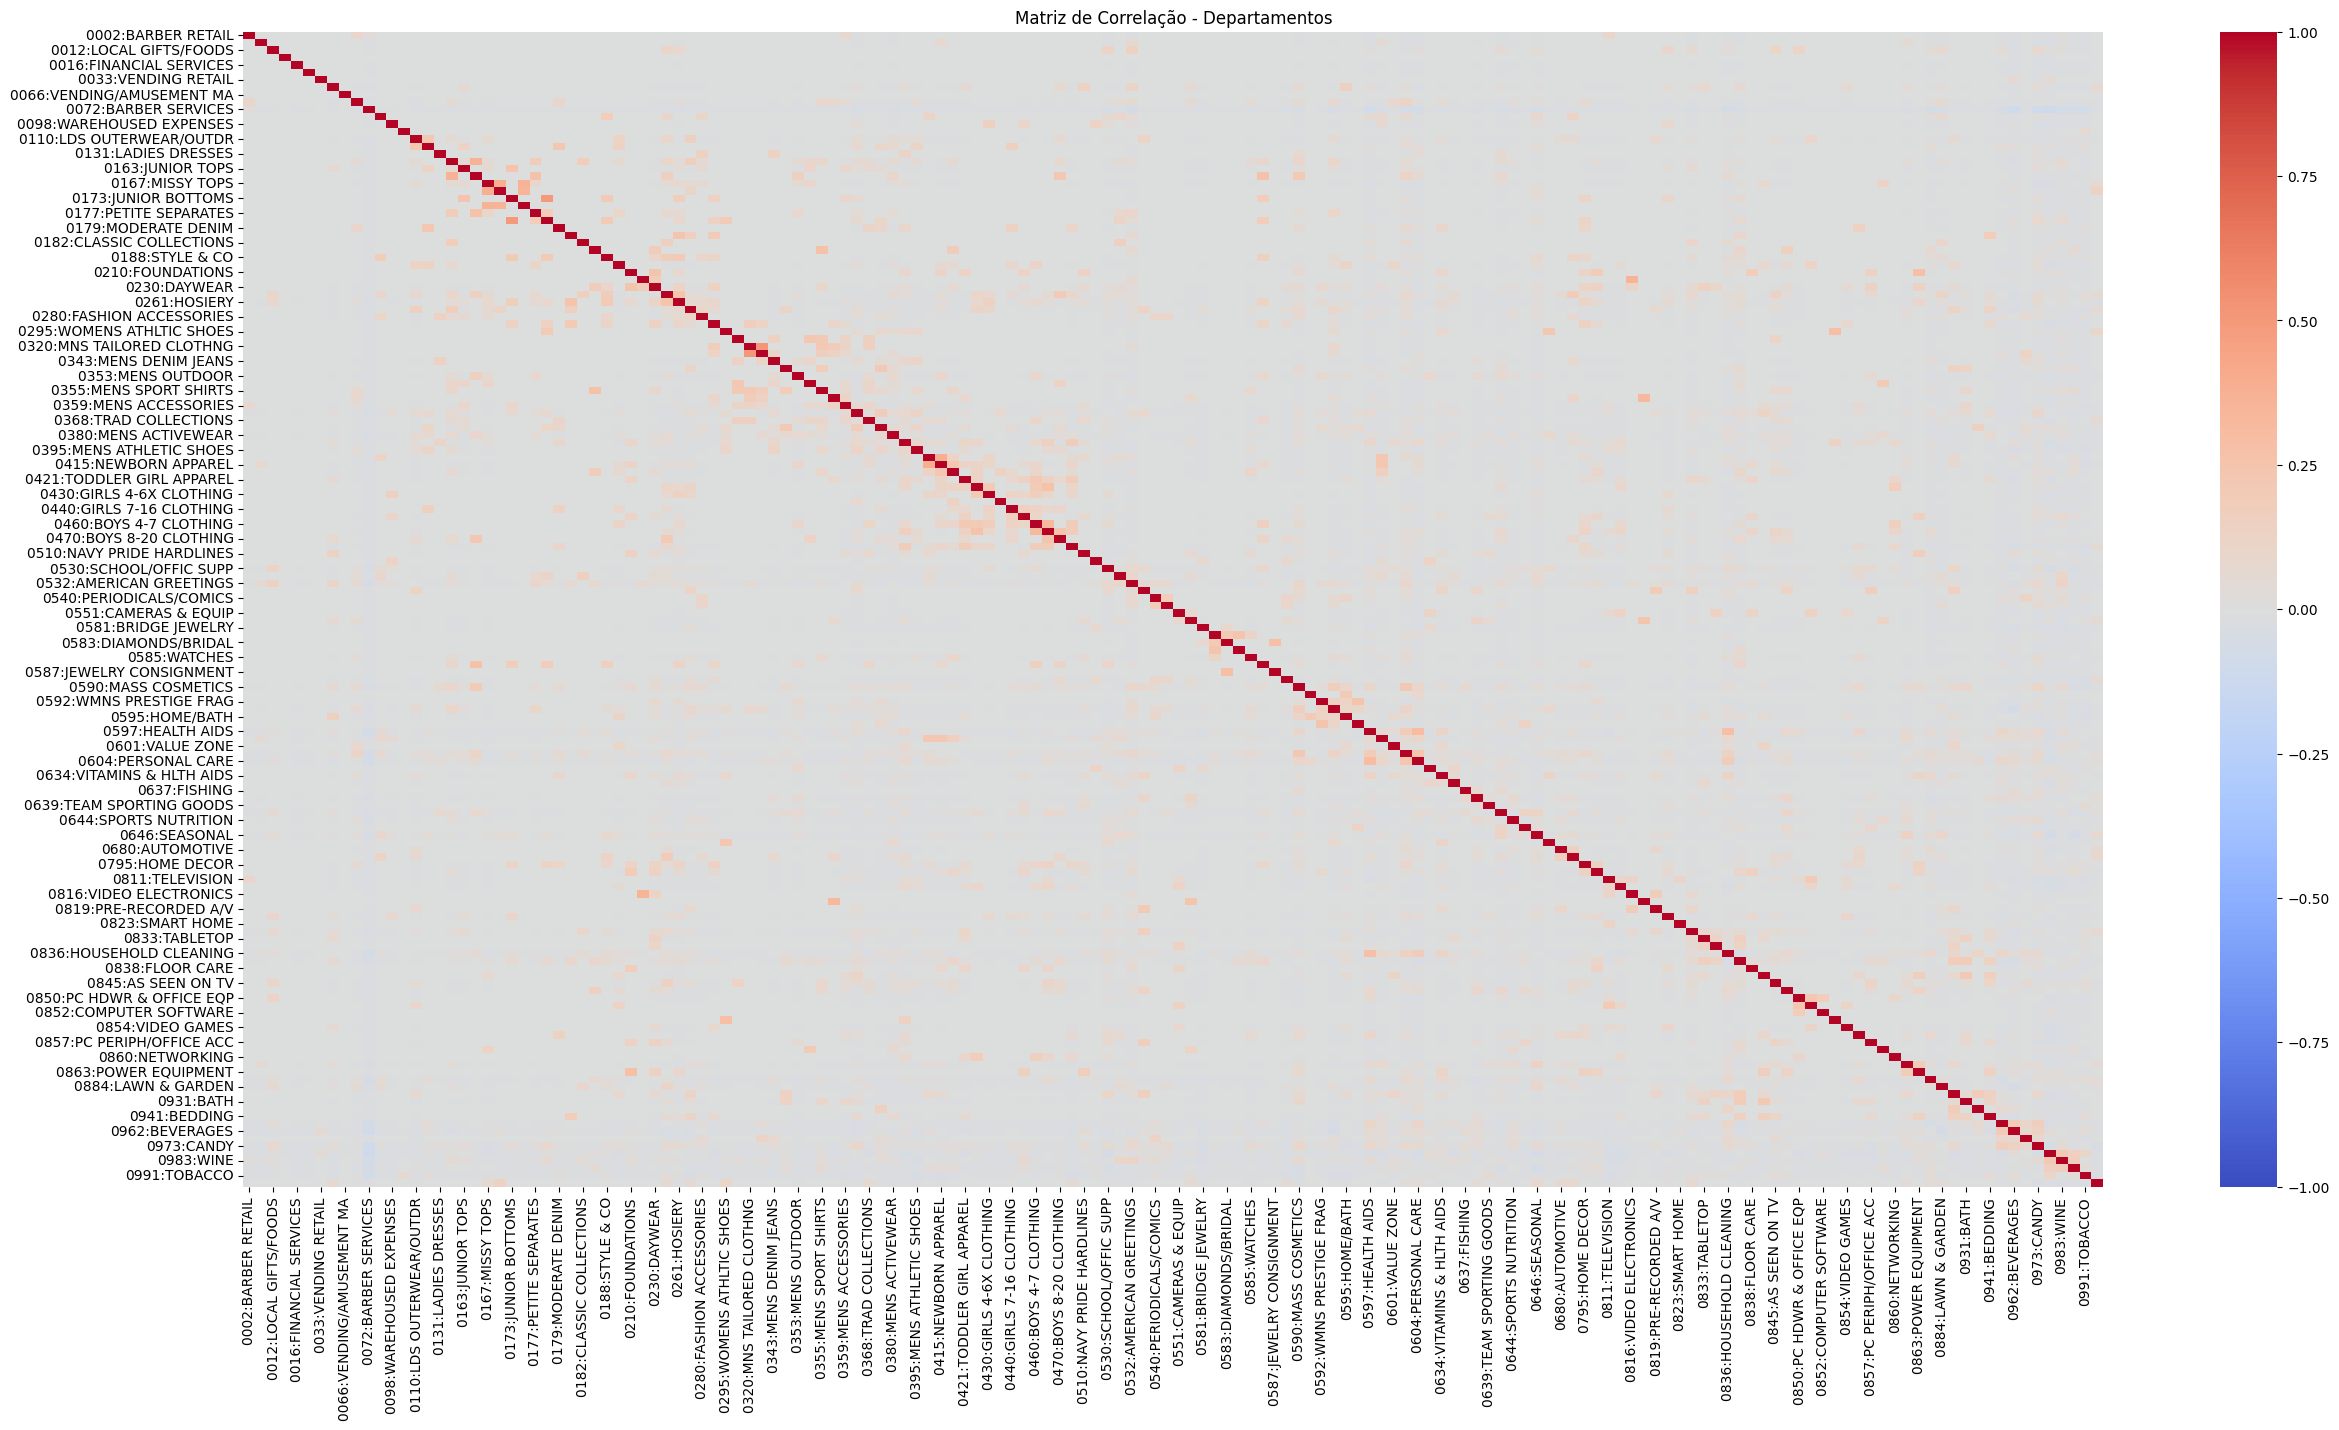

In [35]:
# Qual a correlação entre os departamentos

associacao_departamentos = df_transacoes_pivot.corr()
plt.figure(figsize=(30,15))
sns.heatmap(associacao_departamentos, vmin=-1, vmax=1, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação - Departamentos')
plt.show()

### Realizar Market Basket Analysis com Apriori

In [36]:
# Obter uma lista de itemsets frequentes

# Suporte que seja em 2% a 5%
# Cobertura adequada = 40 a 100 transações
# Diversidade de Departamentos, sem ser muito restririvo

itemsets_frequentes = apriori(df_transacoes_pivot, min_support=0.02, use_colnames=True, verbose=1)

Processing 165 combinations | Sampling itemset size 3


In [37]:
# Quantos itemsets foram selecionados?

len(itemsets_frequentes)

36

In [38]:
# Criar uma coluna para armazenar o tamanho do itemset
itemsets_frequentes['tamanho'] = itemsets_frequentes['itemsets'].apply(lambda x: len(x))

In [39]:
itemsets_frequentes

,support,itemsets,tamanho
0,0.057643,(0072:BARBER SERVICES),1
1,0.024704,(0360:MENS FURNISHINGS),1
2,0.024189,(0380:MENS ACTIVEWEAR),1
3,0.027277,(0530:SCHOOL/OFFIC SUPP),1
4,0.053011,(0532:AMERICAN GREETINGS),1
5,0.026248,(0590:MASS COSMETICS),1
6,0.022645,(0593:PRESTIGE COSMETICS),1
7,0.102934,(0597:HEALTH AIDS),1
8,0.067936,(0603:BEAUTY CARE),1
9,0.077200,(0604:PERSONAL CARE),1


In [40]:
# Filtrar itemsets com 2 departamentos
itemsets_frequentes[itemsets_frequentes.tamanho==2]

,support,itemsets,tamanho
24,0.021616,"(0597:HEALTH AIDS, 0603:BEAUTY CARE)",2
25,0.032939,"(0597:HEALTH AIDS, 0604:PERSONAL CARE)",2
26,0.031395,"(0597:HEALTH AIDS, 0836:HOUSEHOLD CLEANING)",2
27,0.023160,"(0597:HEALTH AIDS, 0973:CANDY)",2
28,0.021101,"(0604:PERSONAL CARE, 0603:BEAUTY CARE)",2
29,0.022131,"(0962:BEVERAGES, 0961:GENERAL GROCERIES)",2
30,0.020072,"(0973:CANDY, 0961:GENERAL GROCERIES)",2
31,0.034483,"(0962:BEVERAGES, 0973:CANDY)",2
32,0.025219,"(0962:BEVERAGES, 0982:SPIRITS)",2
33,0.039629,"(0982:SPIRITS, 0983:WINE)",2


In [41]:
# Validar a informação de suporte. EX: 0982:SPIRITS
# Suport = transações onde o item aparece / total de transacoes

transacoes_spirits = len(df_transacoes_pivot[df_transacoes_pivot['0982:SPIRITS'] == True])
total_transacoes = len(df_transacoes_pivot)
suporte_spirits = transacoes_spirits / total_transacoes

print(f'Suporte 0982:SPIRITS = {suporte_spirits}')

Suporte 0982:SPIRITS = 0.16160576428203807


In [43]:
# Criar regras de Associação, com base nos itemsets frequentes
# Usando Confiança = 30% 

regras_associacao =  association_rules(itemsets_frequentes, metric='confidence', min_threshold=0.3)
regras_associacao

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(0603:BEAUTY CARE),(0597:HEALTH AIDS),0.067936,0.102934,0.021616,0.318182,3.091136,1.0,0.014623,1.315697,0.725803,0.144828,0.239947,0.264091
1,(0597:HEALTH AIDS),(0604:PERSONAL CARE),0.102934,0.077200,0.032939,0.320000,4.145067,1.0,0.024992,1.357059,0.845812,0.223776,0.263112,0.373333
2,(0604:PERSONAL CARE),(0597:HEALTH AIDS),0.077200,0.102934,0.032939,0.426667,4.145067,1.0,0.024992,1.564651,0.822225,0.223776,0.360880,0.373333
3,(0597:HEALTH AIDS),(0836:HOUSEHOLD CLEANING),0.102934,0.081318,0.031395,0.305000,3.750728,1.0,0.023024,1.321845,0.817537,0.205387,0.243482,0.345538
4,(0836:HOUSEHOLD CLEANING),(0597:HEALTH AIDS),0.081318,0.102934,0.031395,0.386076,3.750728,1.0,0.023024,1.461201,0.798301,0.205387,0.315631,0.345538
5,(0603:BEAUTY CARE),(0604:PERSONAL CARE),0.067936,0.077200,0.021101,0.310606,4.023384,1.0,0.015857,1.338567,0.806225,0.170124,0.252932,0.291970
6,(0961:GENERAL GROCERIES),(0962:BEVERAGES),0.050952,0.130211,0.022131,0.434343,3.335689,1.0,0.015496,1.537663,0.737805,0.139159,0.349662,0.302152
7,(0961:GENERAL GROCERIES),(0973:CANDY),0.050952,0.141534,0.020072,0.393939,2.783361,1.0,0.012861,1.416469,0.675121,0.116418,0.294019,0.267879
8,(0983:WINE),(0982:SPIRITS),0.098302,0.161606,0.039629,0.403141,2.494598,1.0,0.023743,1.404678,0.664450,0.179907,0.288093,0.324182
9,(0984:BEER),(0982:SPIRITS),0.067936,0.161606,0.025733,0.378788,2.343901,1.0,0.014755,1.349610,0.615152,0.126263,0.259045,0.269012
